In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# files = [file for file in os.listdir('/content/drive/My Drive/Colab Notebooks/sales-produc-data')]

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

In [ ]:
sales_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/all_data.csv')
sales_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


Data Preprocessing

Data Preprocessing merujuk pada manipulasi atau menghapus(dropping) data sebelum digunakan untuk meningkatkan kinerja dan merupakan langkah penting dalam proses data mining.
Ungkapan "Garbage in, Garbage out" berlaku untuk proyek data mining dan machine learning

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**Uniqueness Categorical Variables**

Mencari berapa banyak unique values yang ada pada variabel-variabel

In [ ]:
categorical = sales_data.select_dtypes(['category', 'object']).columns
for col in categorical:
  print('{} : {} unique value(s)'.format(col, sales_data[col].nunique()))

Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 24 unique value(s)
Order Date : 142396 unique value(s)
Purchase Address : 140788 unique value(s)


**Seberapa banyak missing data points yang dimiliki**

In [ ]:
missing_values_count = sales_data.isnull().sum()
missing_values_count[0:10]

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

akan lebih membantu jika dilihat seberapa persen missing value pada dataset 

In [ ]:
total_cells= np.product(sales_data.shape)
total_missing = missing_values_count.sum()

percent_missing = (total_missing/total_cells)*100
print(f"{percent_missing:.2f}%")

0.29%


**Figure out why the data is missing**

Untuk menangani Missing Data dapat menggunakan "Data Intuition". Yang berarti bahwa "benar-benar mengamati data dan mencoba mencari tahu mengapa bisa terdapat missing value yang akan mempengaruhi proses analisis"
Salah satu pertanyaan yang penting adalah "Apakah nilai yang hilang ini tidak tercatat atau memang tidak ada?"

Jika suatu nilai hilang karena tidak ada, maka tidak akan make sense untuk mencoba dan menebaknya. Sehingga nilai yang hilang dapat diganti menggunakan NaN.
Disisi lain, jika ada nilai yang hilang karena tidak tercatat, maka dapat menerka apa yang mungkin terjadi berdasarkan nilai lainnya yang ada di kolom dan baris tersebut. Proses ini disebut dengan "Imputation"


CLEAN UP THE DATA

In [ ]:
# drop rows of NaN data
sales_data = sales_data.dropna(how='all')
"NaN Value:"
sales_data[sales_data.isna().any(axis=1)]

"Clean Feature Warnings:"
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


Convert Quantity ordered column and Price each column type, because it will add some future features, and we need to multiply this 2 columns

In [ ]:
sales_data["Quantity Ordered"], sales_data['Price Each'] = sales_data["Quantity Ordered"].astype('int64'), sales_data['Price Each'].astype('float')
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Convert Order Date Column, so we can take the year, month, and the other date easily

In [ ]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


**Recap the Data**

This is some point that we have :
1. We have total  186850  records and  6  columns cateogircal type
2. The total of missing value that we have is  0.29167 %
3. Order ID :  178438  unique value(s)
4. Product :  20  unique value(s)
5. Quantity Ordered :  10  unique value(s)
6. Price Each :  24  unique value(s)
7. Order Date :  142396  unique value(s)
8. Purchase Address :  140788  unique value(s)

**Data Preparation**

Data Preparation merupakan aksi dari manipulasi raw data menjadi sebuah bentuk yang dapat dengan mudah dan akurat untuk dianalisis, misalnya untuk tujuan bisnis. Data Preparation merupakan step atau langkah dari  pre-processing yang mana data dari satu atau lebih sumber dibersihkan dan ditransformasi untuk meningkatkan kualitas data tsb sebelum digunakan untuk bisnis analytics

Add Month, Hour, Minute, Sales, Cities Columns

In [ ]:
def augment_data(data):
  def get_city(address):
    return address.split(',')[1]
  
  def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
  data['Year'] = data['Order Date'].dt.year

  data['Month'] = data['Order Date'].dt.month

  data['Hour'] = data['Order Date'].dt.hour

  data['Minute'] = data['Order Date'].dt.minute

  data['Sales'] = data['Quantity Ordered']*data['Price Each']

  data['Cities'] = data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)}")

  return data

sales_Data = augment_data(sales_data)
sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle (WA
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas (TX
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland (OR
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles (CA
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City (NY


DATA ANALYSIS

Data analysis adalah proses yang sistematis dalam mengaplikasikan teknikstatistik dan/atau logical untuk mendeskripsikan dan mengilustrasikan, merangkum serta mengevaluasi data. Memang, peneliti umumnya menganalisis mengenai pola dalam pengamatan melalui seluruh fase pengumpulan data. Menganalisis dan menginvestigasi dataset dan meringkat karakteristik utamanya, seringkali menggunakan teknik visualisasi data.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

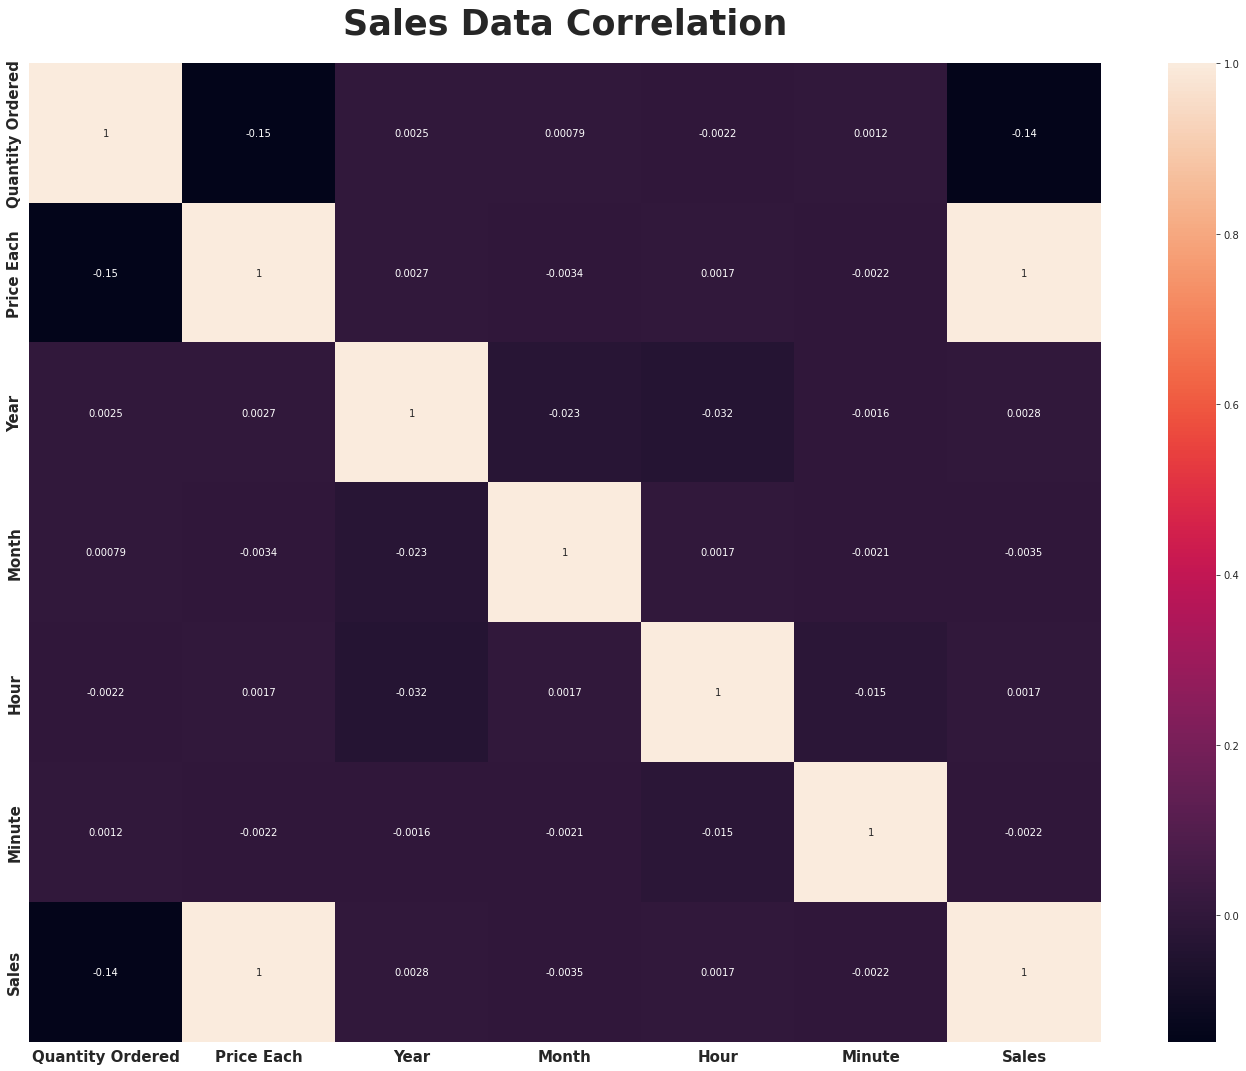

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(24, 18))
sns.heatmap(sales_data.corr(), annot=True)
plt.title("Sales Data Correlation", weight="bold", fontsize=35, pad=30)
plt.xticks(weight="bold", fontsize=15)
plt.yticks(weight="bold", fontsize=15)

In [ ]:
# show correlation each feature
(sales_data.corr()['Sales'].sort_values(ascending=False).to_frame().T)

,Sales,Price Each,Year,Hour,Minute,Month,Quantity Ordered
Sales,1.0,0.999203,0.002824,0.001668,-0.002162,-0.003466,-0.139417


In [ ]:
# statistical measure of sales data without object type of data
sales_data_numeric = sales_Data.describe(include=[np.number])
"statistical measure of sales data in numeric data"
sales_data_numeric

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.059140,14.413305,29.481361,185.490917
std,0.442793,332.731330,0.013521,3.502996,5.423416,17.317573,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


In [ ]:
# statistical measure of sales data without numeric type of data
sales_data_object = sales_data.describe(exclude=[np.number])
"statistical measure of sales data in object/str data"
sales_data_object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Order ID,Product,Order Date,Purchase Address,Cities
count,185950,185950,185950,185950,185950
unique,178437,19,142395,140787,10
top,160873,USB-C Charging Cable,2019-12-15 20:16:00,"193 Forest St, San Francisco, CA 94016",San Francisco (CA
freq,5,21903,8,9,44732
first,NaN,NaN,2019-01-01 03:07:00,NaN,NaN
last,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


UNIVARIATE ANALYSIS

univariate analysis merupakan bentuk paling sederhana dari statistical analysis. seperti halnya bentuk statistik lainnya, dapat bersifat inferensial atau descriptive. Fakta kuncinya adalah hanya satu variabel yang terlibat. univariate analysis dapat menghasilkan result yang menyesatkan, sehingga analisis multivariate lebih tepat

In [ ]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):

  fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,6))
  sns.distplot(data, ax=ax1, kde=True, color=color)
  ax1.set_title(title1, weight="bold", fontsize=25, pad=30)
  qqplot(data, ax=ax2, line='s')
  ax2.set_title(title2, weight="bold", fontsize=25, pad=30)
  return fig

In [ ]:
 """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """

'\n   Showing visualization of univariate\n   analysis with displot and qqplot\n   visualization from seaborn and statsmodel\n   library.\n   \n   Parameters\n   ----------\n   data : DataFrame, array, or list of arrays, optional\n       Dataset for plotting. If ``x`` and ``y`` are absent, this is\n       interpreted as wide-form. Otherwise it is expected to be long-form. \n   title1: The title of the visualization, title1 for displot visualization\n       And title2 for quantile plot from statsmodel.\n   title2: The title of the visualization, title1 for displot visualization\n       And title2 for quantile plot from statsmodel.\n       \n   Returns\n   -------\n   fig : matplotlib figure\n       Returns the Figure object with the plot drawn onto it.\n   '

Let's try to find the proportion that lies in between two standard deviation ( σ ) from mean ( μ ) using Chebychev's Theorem, and let's try to interprete...

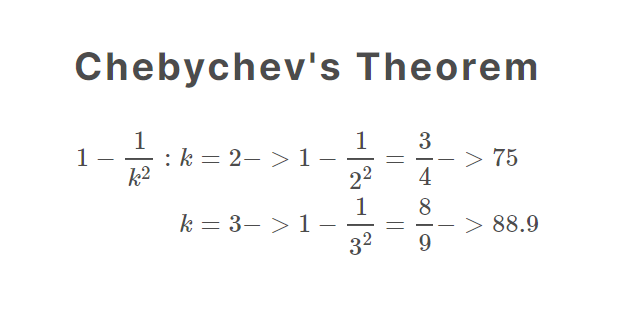

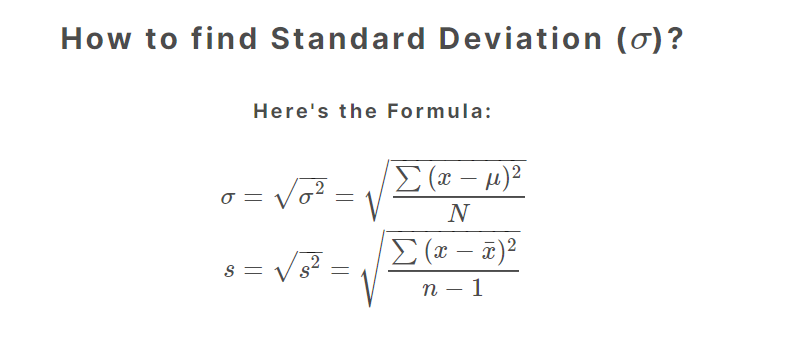

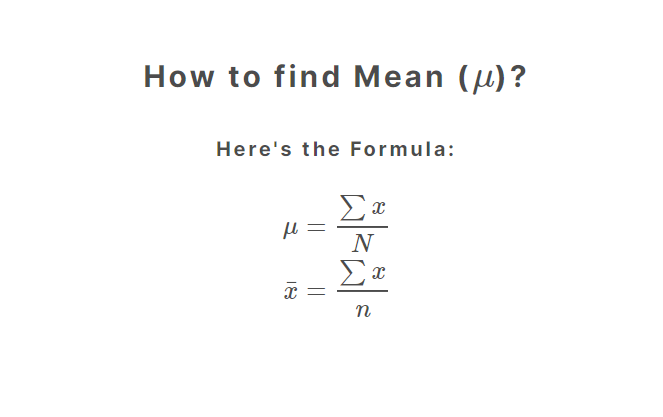

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


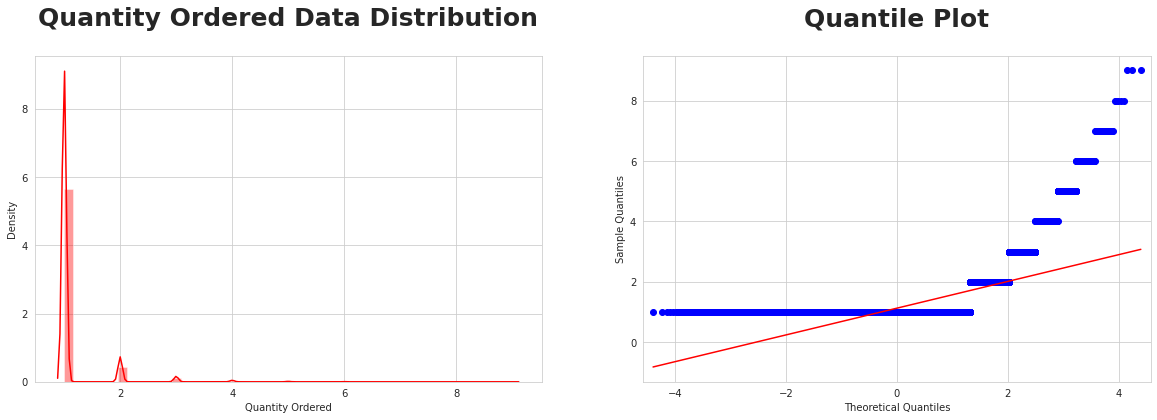

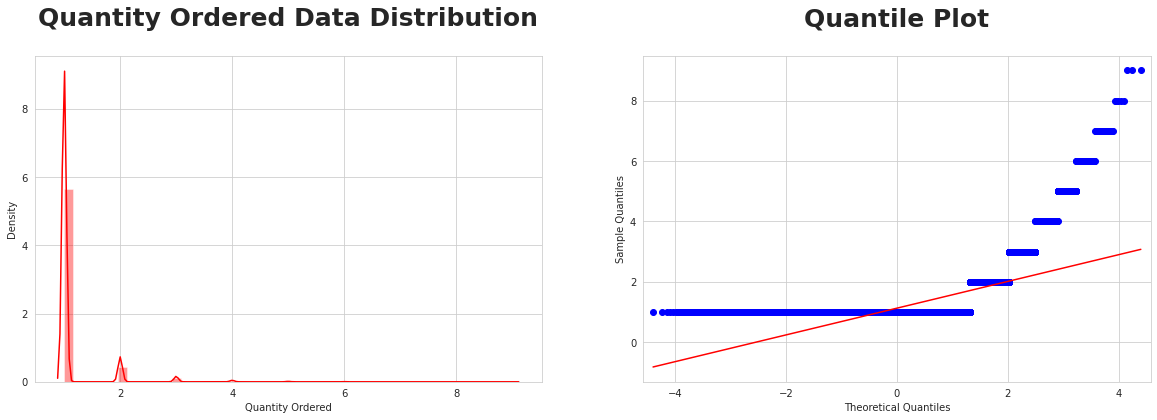

In [ ]:
# quantity ordered data
univariate_analysis(data=sales_data['Quantity Ordered'], color='red', title1='Quantity Ordered Data Distribution', title2='Quantile Plot')

Here we can see it, the average customer buys  1  item/product more often, there are also a few customers who buy  2  or  4  items/product at once, more than that it is very rare.

Quantity Ordered
Find the proportion that lies in between two standard deviation ( σ ) from mean ( μ ), and let's try to interprete that. and In the Quantity Ordered Data, the  μ=1.12  and the  σ=0.44 , then without further ado let's calculate it.

Calculation:
- 1.12−2(0.44)=0.2 
- 1.12+2(0.44)=2 

Interpretation:
At least  75%  of the Sales Data Quantity Ordered population in the USA has a Quantity Ordered range from  0−2  item/product.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


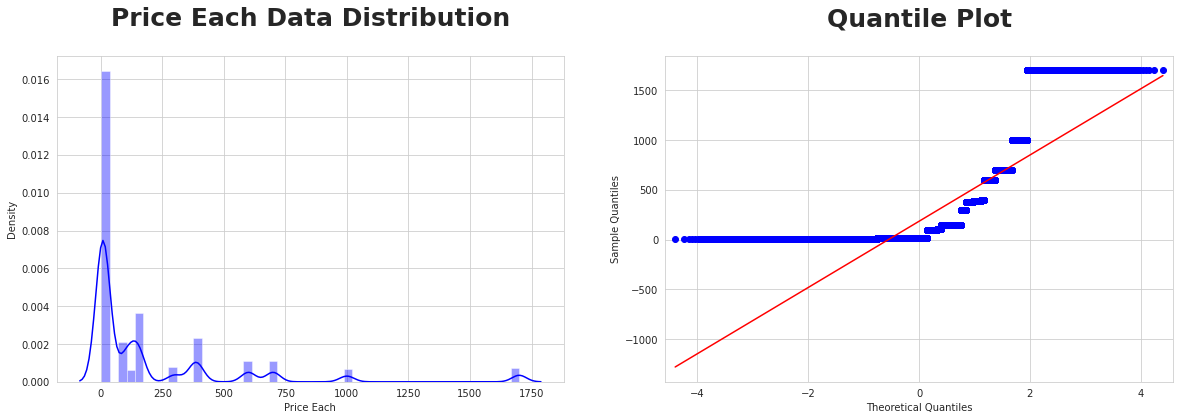

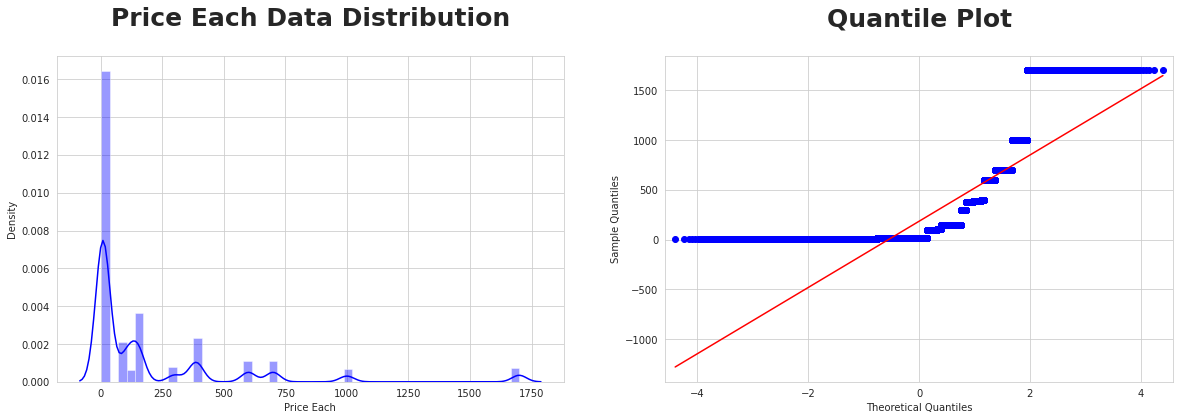

In [ ]:
# price each data

univariate_analysis(data=sales_Data['Price Each'], color='blue', title1='Price Each Data Distribution', title2='Quantile Plot')

Price Each
Find the proportion that lies in between two standard deviation ( σ ) from mean ( μ ), and let's try to interprete that. and in the Price Each Data, the  μ=184.3  and the  σ=332.7 , then without further ado let's calculate it.

Calculation:
- 184.3−2(332.7)=−481 
- 184.3+2(332.7)=849.7 

Interpretation:
At least  75%  of the population Sales Price data for each item/product in the USA has a price range for each item/product from  0−849.7  (USD).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


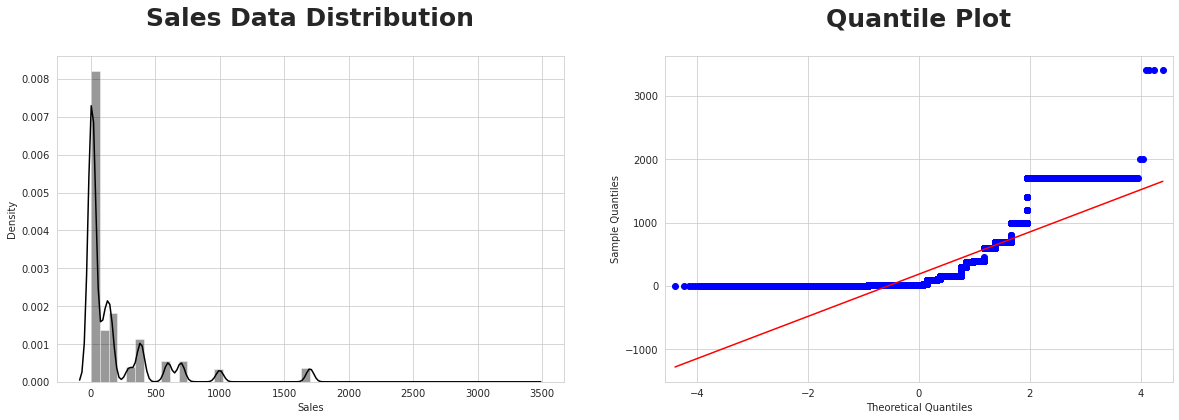

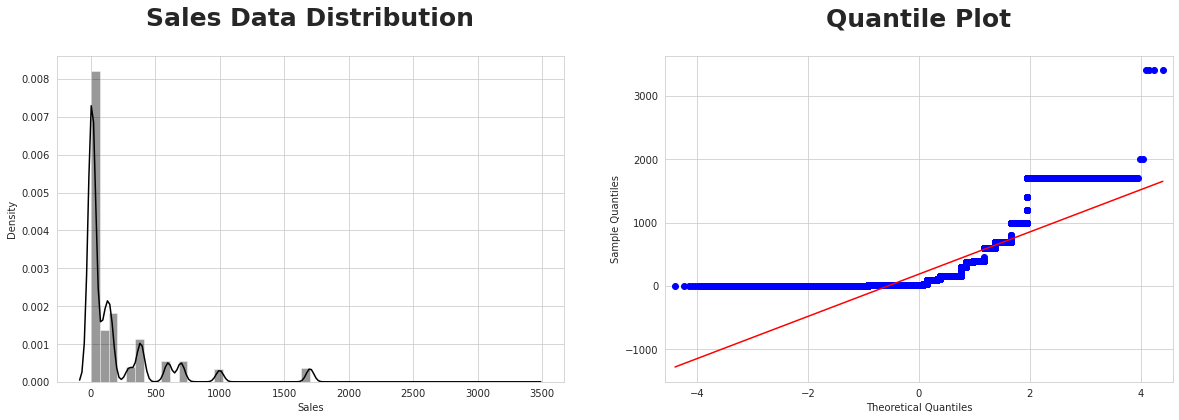

In [ ]:
# sales data
univariate_analysis(data=sales_data['Sales'], color='black', title1='Sales Data Distribution', title2='Quantile Plot')

Find the proportion that lies in between two standard deviation ( σ ) from mean ( μ ), and let's try to interprete that. and in the Sales Data, the  μ=185.4  and the  σ=332.9 , then without further ado let's calculate it.

Calculation:
- 185.4−2(332.9)=−480 
- 185.4+2(332.9)=851.19 

Interpretation:
At least  75%  of population Sales Data customers in USA have Sales range from  0−851.19  (USD)

In [ ]:
# checking skewness value
# if value lies between -0.5 to 0.5 then it is normal otherwise skewed
skew_value = sales_data.skew().sort_values(ascending=False).to_frame()
skew_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,0
Year,73.933795
Quantity Ordered,4.833164
Sales,2.881913
Price Each,2.872149
Minute,0.002580
Order ID,0.000719
Month,-0.088588
Hour,-0.530377


It can be seen that most of the data we have are in the form of a normal distribution, and there are two skewed data.

**TASK**

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]), <a list of 9 Text major ticklabel objects>)

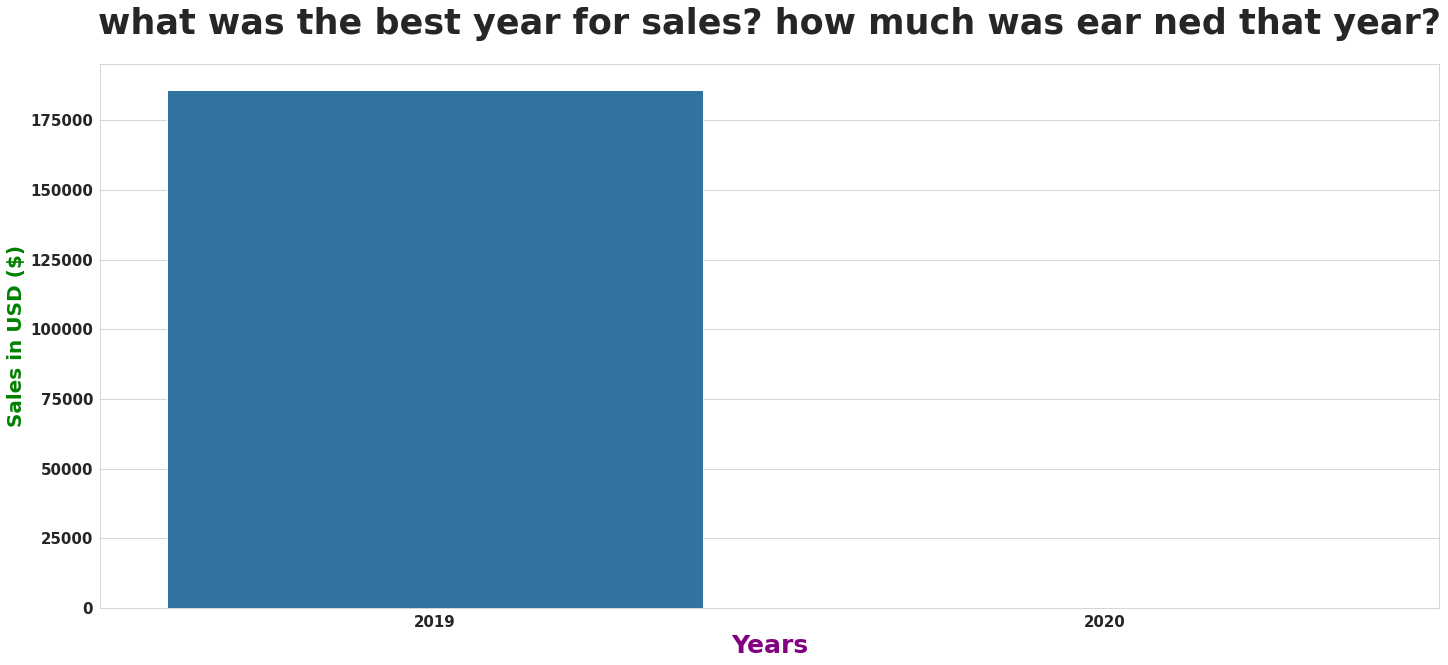

In [ ]:
plt.figure(figsize=(24,10))

sns.countplot(x="Year", data=sales_data)
plt.title("what was the best year for sales? how much was ear ned that year?", weight='bold', fontsize=35, pad=30)
plt.xlabel("Years", weight="bold", color="purple", fontsize=25)
plt.xticks(weight="bold", fontsize=15)
plt.ylabel("Sales in USD ($)", weight="bold", color="green", fontsize=20)
plt.yticks(weight="bold", fontsize=15)

ANSWER:


When viewed from the data above,  2019  was the best year that had the highest number of sales, which was  $34,483,365 , compared to  2020  which only had  $8,670  in sales, this is due to the lack of data in  2020  which caused a data imbalance.

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.]),
 <a list of 6 Text major ticklabel objects>)

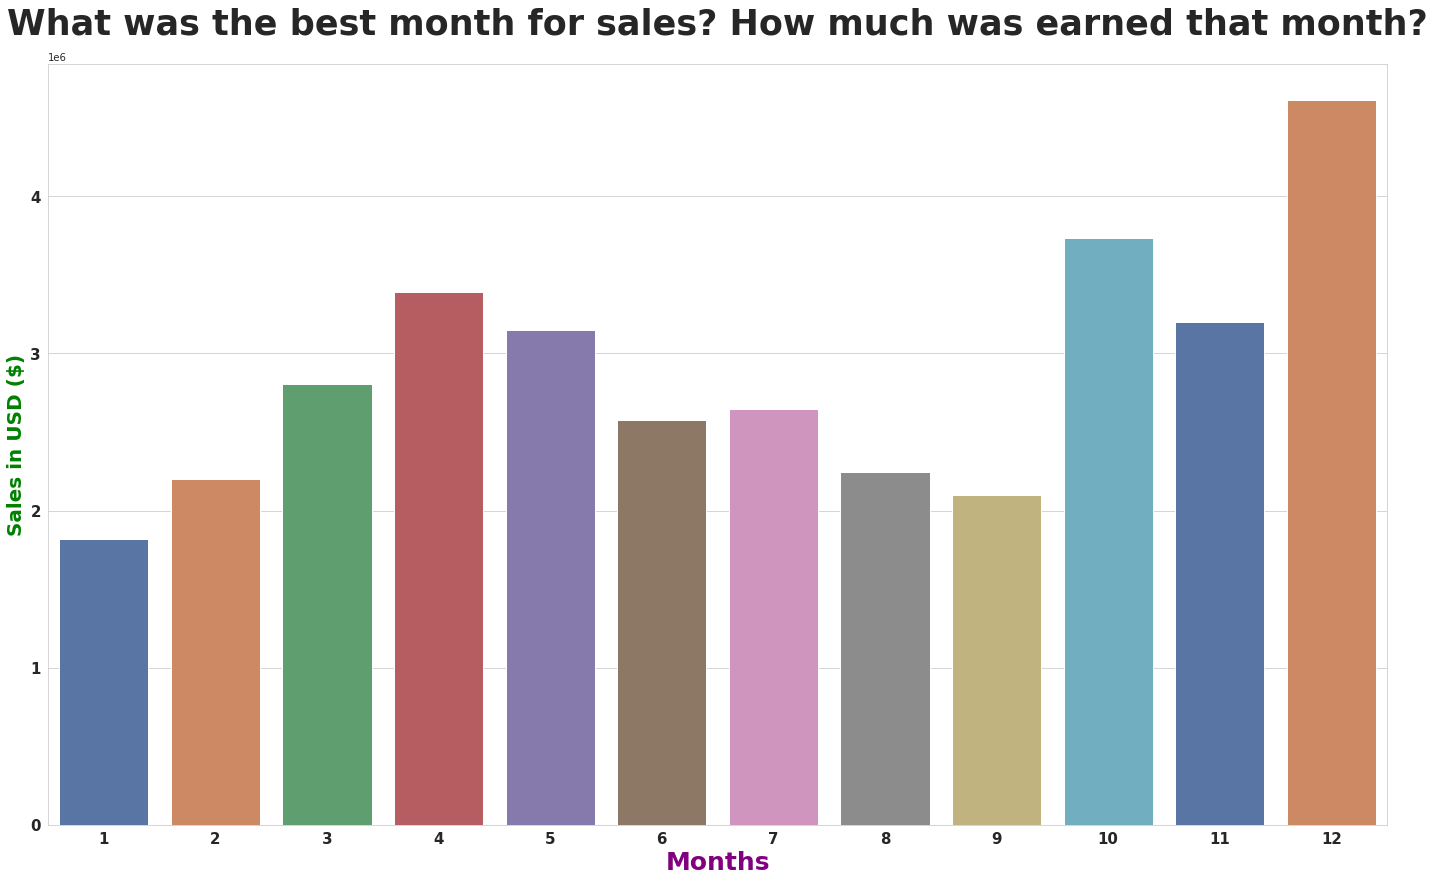

In [ ]:
# group the Month cols
sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')

plt.figure(figsize=(24, 14))

sns.barplot(
    x=sum_of_month_and_earned.index,
    y=sum_of_month_and_earned['Sales'],
    data=sum_of_month_and_earned,
    palette='deep'
)
plt.title(
    "What was the best month for sales? How much was earned that month?",
    weight="bold",
    fontsize=35,
    pad=30
)

plt.xlabel(
    "Months",
    weight="bold",
    color="purple",
    fontsize=25
)
plt.xticks(
    weight="bold",
    fontsize=15
)
plt.ylabel(
    "Sales in USD ($)",
    weight="bold",
    color="green",
    fontsize=20
)
plt.yticks(
    weight="bold",
    fontsize=15
)

Answer:
The best month to sell is shown in the visualization above is December which has a record number of sales reaching  $4,613,443 , sales,This may be because in December there is Christmas, where many people buy groceries to make cakes or toys as gifts for loved ones.

(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000., 8000000., 9000000.]),
 <a list of 10 Text major ticklabel objects>)

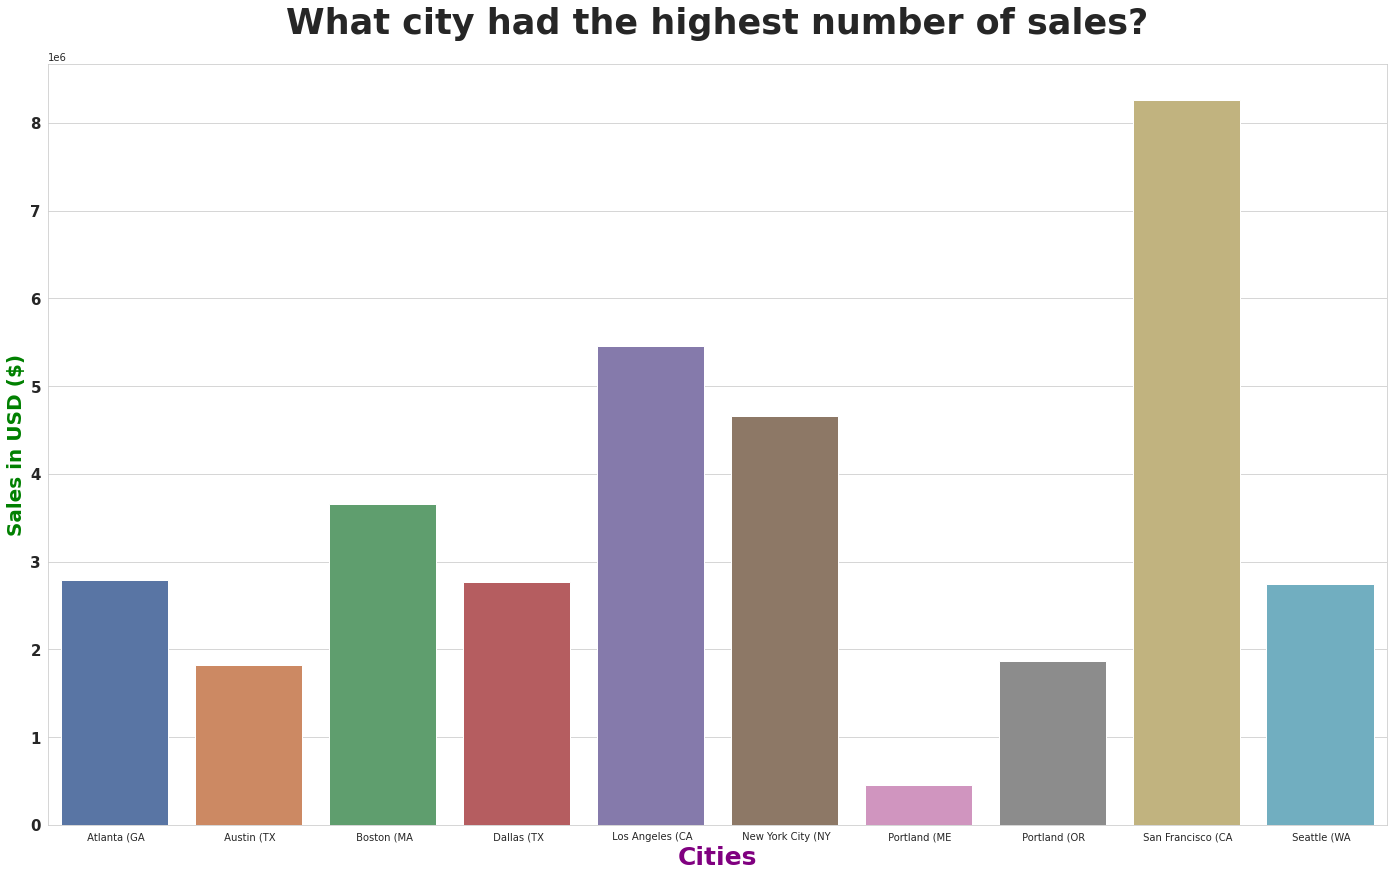

In [ ]:
# group the highest number of sales in city
highest_number_of_sales=sales_data.groupby('Cities').sum().astype('int')

plt.figure(figsize=(24,14))

sns.barplot(
    x=highest_number_of_sales.index,
    y = highest_number_of_sales["Sales"],
    data=highest_number_of_sales,
    palette="deep"
)

plt.title(
    "What city had the highest number of sales?",
    weight="bold",
    fontsize=35,
    pad=30
)
plt.xlabel(
    "Cities",
    weight="bold",
    color="purple",
    fontsize=25
)
plt.ylabel(
    "Sales in USD ($)",
    weight="bold",
    color="green",
    fontsize=20
)
plt.yticks(
    weight="bold",
    fontsize=15
)

**Answer:**
The city that has the most sales data in the above visualization is San Francisco, with total sales reaching  $8,262,203 .

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

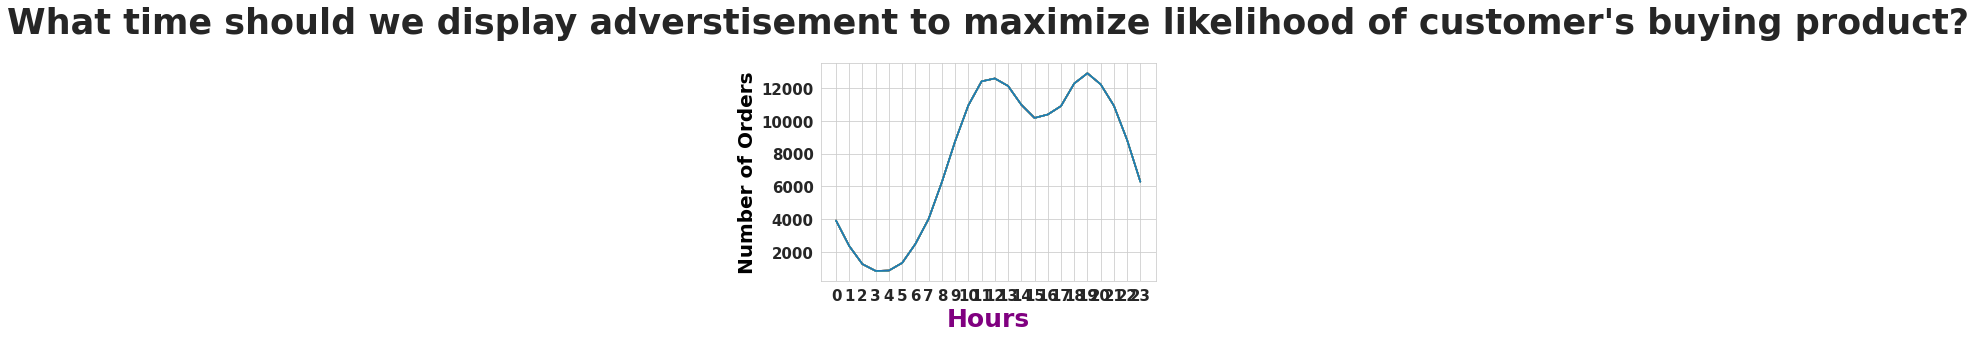

In [ ]:
# let's prepare the value for the x-axis
hours=[hour for hour, df in sales_data.groupby('Hour')]

plt.plot(
    hours,
    sales_data.groupby(['Hour']).count()
)

# add grid
plt.grid(True)
plt.title(
    "What time should we display adverstisement to maximize likelihood of customer's buying product?",
    weight="bold",
    fontsize=35,
    pad=30
)
plt.xlabel(
    "Hours",
    weight="bold",
    color="purple",
    fontsize=25
)
plt.xticks(
    ticks=hours,
    weight="bold",
    fontsize=15
)
plt.ylabel(
    "Number of Orders",
    weight="bold",
    color="black",
    fontsize=20,
)
plt.yticks(
    weight="bold",
    fontsize=15
)

**Answer:**
My recommendation if you want to place an ad, place the ad at  9  am or  10  am, because there is an increase in the number of orders at that time

**What products are most often sold together?**





In [ ]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variabel for counter
count=Counter()
# make a for loop
for row in data['Grouped']:
  row_list=row.split(',')
  count.update(Counter(combinations(row_list, 2)))

# make another for loop
for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Answer:**
Products that are often sold simultaneously are iPhone and Lightning Charging Cable which sold  1005  orders, and Google Phone, USB-C Charging Cable ranked second with  987  orders.